Importing the required libraries

In [1]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

Add CNN Layers

In [3]:
#create model
model=Sequential ()

In [4]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [5]:
#flatten the dimension of the image
model.add(Flatten())

In [6]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

Compiling the model

In [7]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [8]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Train the model

In [9]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 137s 69ms/step - loss: 0.1989 - accuracy: 0.9543 - val_loss: 0.0839 - val_accuracy: 0.9761
Epoch 2/5
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0614 - accuracy: 0.9811 - val_loss: 0.0764 - val_accuracy: 0.9789
Epoch 3/5
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0905 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0978 - val_accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0864 - val_accuracy: 0.9779


Observing the metrics


In [10]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.08635331690311432, 0.9779000282287598]


In [11]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 4s 4s/step
[[3.3375277e-13 2.3497841e-14 2.2172753e-14 6.0079930e-07 1.6755180e-04
  2.7669451e-09 3.6617560e-13 9.0538032e-07 1.4666308e-07 9.9983084e-01]]


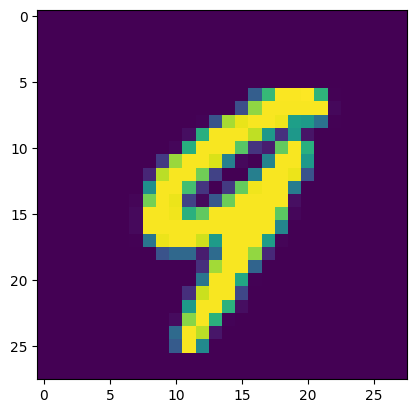

In [12]:
plt.imshow(x_test[5100])

In [13]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [14]:
np.argmax(y_test[5100:5101]) #printing the actual labels

9

Save The model

In [ ]:
# Save the model
model.save('models/mnistCNN.h5')